The 2008 recession.
---


 

In [244]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
# Study data files
#t1_path = "data/2007fifteen.csv"
#t2_path = "data/2007twentyfive.csv"
employment_path = "data/2007type.csv"
# Read the mouse data and the study results
#t1_data = pd.read_csv(t1_path)
#t2_data = pd.read_csv(t2_path)
employment_data = pd.read_csv(employment_path)
pd.set_option('display.float_format', '{:.2f}'.format)

# Display the DataFrame
employment_data.head(19)


,North American Industry Classification System (NAICS),7-Jan,7-Feb,7-Mar,7-Apr,7-May,7-Jun,7-Jul,7-Aug,7-Sep,7-Oct,7-Nov,7-Dec,8-Jan,8-Feb,8-Mar,8-Apr,8-May,8-Jun,8-Jul,8-Aug,8-Sep,8-Oct,8-Nov,8-Dec,9-Jan,9-Feb,9-Mar,9-Apr,9-May,9-Jun,9-Jul,9-Aug,9-Sep,9-Oct,9-Nov,9-Dec,10-Jan,10-Feb,10-Mar,10-Apr,10-May,10-Jun,10-Jul,10-Aug,10-Sep,10-Oct,10-Nov,10-Dec
0,"Total employed all industries x100,000",162.64,163.39,163.80,164.67,168.54,170.72,171.38,170.97,168.41,169.26,168.83,168.21,165.87,166.79,166.92,167.72,171.45,173.72,173.06,172.91,170.93,171.51,169.85,168.90,164.70,164.90,164.49,165.36,168.90,170.78,169.95,169.75,168.10,168.25,168.27,167.19,164.71,165.31,165.55,167.32,170.90,173.87,173.23,172.98,171.23,171.06,170.90,170.35
1,Goods-producing sector,38.27,38.09,37.91,38.48,40.23,41.00,41.81,41.92,40.51,40.28,39.67,38.63,37.83,37.84,38.07,38.66,40.59,41.50,41.68,42.04,41.02,40.65,39.72,38.63,36.36,36.03,35.98,36.18,37.60,38.50,38.86,38.89,38.38,38.13,37.52,36.54,35.23,35.40,35.37,36.19,37.75,38.78,39.26,39.29,38.53,38.24,37.92,37.09
2,Agriculture,3.09,3.00,3.06,3.24,3.37,3.44,3.57,3.59,3.45,3.39,3.16,3.00,3.02,2.97,3.06,3.17,3.42,3.48,3.53,3.50,3.46,3.38,3.05,3.00,2.87,2.99,3.04,3.23,3.35,3.42,3.41,3.45,3.33,3.22,3.03,2.88,2.80,2.82,2.90,2.92,3.17,3.16,3.28,3.25,3.09,3.12,2.92,2.82
3,Forestry fishing mining quarrying oil and gas,3.38,3.39,3.29,3.26,3.54,3.61,3.59,3.62,3.45,3.45,3.34,3.37,3.32,3.33,3.31,3.17,3.47,3.62,3.58,3.54,3.51,3.54,3.43,3.41,3.33,3.13,2.98,2.86,3.16,3.31,3.32,3.32,3.16,3.08,3.07,3.04,3.06,3.14,3.10,3.07,3.33,3.49,3.52,3.47,3.40,3.14,3.24,3.21
4,Utilities,1.17,1.17,1.19,1.18,1.23,1.28,1.34,1.37,1.32,1.31,1.33,1.32,1.36,1.38,1.38,1.38,1.42,1.43,1.47,1.51,1.46,1.44,1.45,1.45,1.45,1.46,1.47,1.44,1.48,1.48,1.45,1.47,1.48,1.48,1.44,1.42,1.38,1.41,1.38,1.42,1.42,1.44,1.44,1.43,1.43,1.38,1.34,1.32
5,Construction,10.55,10.57,10.54,11.01,11.79,12.08,12.58,12.46,12.13,12.14,12.14,11.64,11.14,11.30,11.42,11.91,12.64,13.07,13.46,13.56,13.28,13.24,13.09,12.21,11.26,11.07,11.02,11.15,11.95,12.50,12.87,12.73,12.63,12.62,12.35,11.79,11.05,10.98,11.11,11.78,12.47,13.00,13.21,13.38,13.15,13.14,13.03,12.36
6,Manufacturing,20.07,19.96,19.83,19.80,20.31,20.59,20.73,20.88,20.17,20.00,19.70,19.29,19.00,18.86,18.91,19.02,19.64,19.90,19.65,19.93,19.31,19.05,18.70,18.56,17.46,17.39,17.47,17.50,17.65,17.80,17.80,17.92,17.78,17.73,17.64,17.42,16.94,17.06,16.87,17.01,17.37,17.69,17.82,17.76,17.46,17.45,17.40,17.38
7,Services-producing sector,124.38,125.30,125.89,126.19,128.31,129.72,129.57,129.05,127.91,128.98,129.16,129.58,128.04,128.95,128.85,129.06,130.87,132.21,131.38,130.86,129.91,130.86,130.13,130.27,128.34,128.86,128.51,129.19,131.30,132.28,131.10,130.86,129.73,130.12,130.75,130.65,129.48,129.91,130.18,131.13,133.14,135.09,133.97,133.69,132.70,132.82,132.98,133.26
8,Wholesale and retail trade,26.06,26.09,26.28,26.44,26.92,26.79,27.23,26.92,26.37,26.69,27.13,27.42,26.31,26.52,26.48,26.61,26.82,27.06,27.16,26.88,26.49,26.78,27.08,27.28,26.39,26.11,26.10,26.38,26.75,26.54,26.81,26.81,26.14,26.54,26.86,27.41,26.55,26.33,26.45,26.73,27.21,27.56,27.42,27.45,26.90,26.93,27.30,27.62
9,Transportation and warehousing,8.09,8.28,8.20,8.24,8.37,8.59,8.56,8.53,8.65,8.58,8.78,8.80,8.82,8.83,8.77,8.64,8.65,8.74,8.67,8.78,8.82,8.75,8.56,8.67,8.38,8.39,8.30,8.28,8.22,8.33,8.18,8.15,8.15,8.20,8.21,8.10,7.87,7.91,7.78,7.78,8.09,8.16,7.99,8.13,8.27,8.26,8.24,8.36


In [374]:
agriculture_data = employment_data.loc[employment_data['North American Industry Classification System (NAICS) '] == 'Agriculture ']
forestry_data = employment_data.loc[employment_data['North American Industry Classification System (NAICS) '] == 'Forestry fishing mining quarrying oil and gas']
utilities_data = employment_data.loc[employment_data['North American Industry Classification System (NAICS) '] == 'Utilities']
construction_data = employment_data.loc[employment_data['North American Industry Classification System (NAICS) '] == 'Construction']
manufacturing_data = employment_data.loc[employment_data['North American Industry Classification System (NAICS) '] == 'Manufacturing']
wholesale_trade_data = employment_data.loc[employment_data['North American Industry Classification System (NAICS) '] == 'Wholesale and retail trade']
transportation_data = employment_data.loc[employment_data['North American Industry Classification System (NAICS) '] == 'Transportation and warehousing']
finance_data = employment_data.loc[employment_data['North American Industry Classification System (NAICS) '] == 'Finance insurance real estate rental and leasing']
professional_services_data = employment_data.loc[employment_data['North American Industry Classification System (NAICS) '] == 'Professional scientific and technical services']
business_services_data = employment_data.loc[employment_data['North American Industry Classification System (NAICS) '] == 'Business building and other support services ']
educational_services_data = employment_data.loc[employment_data['North American Industry Classification System (NAICS) '] == 'Educational services']
health_care_data = employment_data.loc[employment_data['North American Industry Classification System (NAICS) '] == 'Health care and social assistance']
information_data = employment_data.loc[employment_data['North American Industry Classification System (NAICS) '] == 'Information culture and recreation']
accommodation_data = employment_data.loc[employment_data['North American Industry Classification System (NAICS) '] == 'Accommodation and food services']
other_services_data = employment_data.loc[employment_data['North American Industry Classification System (NAICS) '] == 'Other services (except public administration)']
public_administration_data = employment_data.loc[employment_data['North American Industry Classification System (NAICS) '] == 'Public administration']
goods_producings_data = employment_data.loc[employment_data['North American Industry Classification System (NAICS) '] == 'Goods-producing sector ']
services_producing_data = employment_data.loc[employment_data['North American Industry Classification System (NAICS) '] == 'Services-producing sector ']
total_data = employment_data.loc[employment_data['North American Industry Classification System (NAICS) '] == 'Total employed all industries x100,000']

#print(total_data )

In [349]:
#for index, row in employment_data.iterrows():
 #  print(row['North American Industry Classification System (NAICS) '])

In [373]:
melted_agriculture_data = agriculture_data.melt(id_vars='North American Industry Classification System (NAICS) ', var_name='Month', value_name='Value')
melted_educational_services_data = educational_services_data.melt(id_vars='North American Industry Classification System (NAICS) ', var_name='Month', value_name='Value')
melted_forestry_data = forestry_data.melt(id_vars='North American Industry Classification System (NAICS) ', var_name='Month', value_name='Value')
melted_utilities_data = utilities_data.melt(id_vars='North American Industry Classification System (NAICS) ', var_name='Month', value_name='Value')
melted_construction_data = construction_data.melt(id_vars='North American Industry Classification System (NAICS) ', var_name='Month', value_name='Value')
melted_manufacturing_data = manufacturing_data.melt(id_vars='North American Industry Classification System (NAICS) ', var_name='Month', value_name='Value')
melted_wholesale_trade_data = wholesale_trade_data.melt(id_vars='North American Industry Classification System (NAICS) ', var_name='Month', value_name='Value')
melted_transportation_data = transportation_data.melt(id_vars='North American Industry Classification System (NAICS) ', var_name='Month', value_name='Value')
melted_finance_data = finance_data.melt(id_vars='North American Industry Classification System (NAICS) ', var_name='Month', value_name='Value')
melted_professional_services_data = professional_services_data.melt(id_vars='North American Industry Classification System (NAICS) ', var_name='Month', value_name='Value')
melted_business_services_data = business_services_data.melt(id_vars='North American Industry Classification System (NAICS) ', var_name='Month', value_name='Value')
melted_health_care_data = health_care_data.melt(id_vars='North American Industry Classification System (NAICS) ', var_name='Month', value_name='Value')
melted_information_data = information_data.melt(id_vars='North American Industry Classification System (NAICS) ', var_name='Month', value_name='Value')
melted_accommodation_data = accommodation_data.melt(id_vars='North American Industry Classification System (NAICS) ', var_name='Month', value_name='Value')
melted_other_services_data = other_services_data.melt(id_vars='North American Industry Classification System (NAICS) ', var_name='Month', value_name='Value')
melted_public_administration_data = public_administration_data.melt(id_vars='North American Industry Classification System (NAICS) ', var_name='Month', value_name='Value')
melted_goods_producings_data = goods_producings_data.melt(id_vars='North American Industry Classification System (NAICS) ', var_name='Month', value_name='Value')
melted_services_producing_data = services_producing_data.melt(id_vars='North American Industry Classification System (NAICS) ', var_name='Month', value_name='Value')
melted_total_data = total_data.melt(id_vars='North American Industry Classification System (NAICS) ', var_name='Month', value_name='Value')


#print(melted_total_data)

In [303]:
lowest_row = melted_agriculture_data.loc[melted_agriculture_data['Value'].idxmin()]

highest_row = melted_agriculture_data.loc[melted_agriculture_data['Value'].idxmax()]

print("Lowest Value:")
print(lowest_row[['Month', 'Value']])

print("\nHighest Value:")
print(highest_row[['Month', 'Value']])

Lowest Value:
Month    10-Jan
Value      2.80
Name: 36, dtype: object

Highest Value:
Month    7-Aug
Value     3.59
Name: 7, dtype: object


In [325]:
lowest_row = melted_educational_services_data.loc[melted_educational_services_data['Value'].idxmin()]

highest_row = melted_educational_services_data.loc[melted_educational_services_data['Value'].idxmax()]


print("Lowest value:")
print(lowest_row[['Month', 'Value']])

print("\nHighest value:")
print(highest_row[['Month', 'Value']])

Lowest value:
Month    9-Aug
Value     9.54
Name: 31, dtype: object

Highest value:
Month    9-Nov
Value    12.41
Name: 34, dtype: object


In [326]:
lowest_row = melted_forestry_data.loc[melted_forestry_data['Value'].idxmin()]

highest_row = melted_forestry_data.loc[melted_forestry_data['Value'].idxmax()]


print("Lowest value:")
print(lowest_row[['Month', 'Value']])

print("\nHighest value:")
print(highest_row[['Month', 'Value']])

Lowest value:
Month    9-Apr
Value     2.86
Name: 27, dtype: object

Highest value:
Month    7-Aug
Value     3.62
Name: 7, dtype: object


In [327]:
lowest_row = melted_utilities_data.loc[melted_utilities_data['Value'].idxmin()]


highest_row = melted_utilities_data.loc[melted_utilities_data['Value'].idxmax()]


print("Lowest value:")
print(lowest_row[['Month', 'Value']])

print("\nHighest value:")
print(highest_row[['Month', 'Value']])

Lowest value:
Month    7-Jan
Value     1.17
Name: 0, dtype: object

Highest value:
Month    8-Aug
Value     1.51
Name: 19, dtype: object


In [328]:
lowest_row = melted_construction_data.loc[melted_construction_data['Value'].idxmin()]

highest_row = melted_construction_data.loc[melted_construction_data['Value'].idxmax()]


print("Lowest value:")
print(lowest_row[['Month', 'Value']])

print("\nHighest value:")
print(highest_row[['Month', 'Value']])

Lowest value:
Month    7-Mar
Value    10.54
Name: 2, dtype: object

Highest value:
Month    8-Aug
Value    13.56
Name: 19, dtype: object


In [329]:
lowest_row = melted_manufacturing_data.loc[melted_manufacturing_data['Value'].idxmin()]


highest_row = melted_manufacturing_data.loc[melted_manufacturing_data['Value'].idxmax()]


print("Lowest value:")
print(lowest_row[['Month', 'Value']])

print("\nHighest value:")
print(highest_row[['Month', 'Value']])

Lowest value:
Month    10-Mar
Value     16.87
Name: 38, dtype: object

Highest value:
Month    7-Aug
Value    20.88
Name: 7, dtype: object


In [330]:
lowest_row = melted_wholesale_trade_data.loc[melted_wholesale_trade_data['Value'].idxmin()]


highest_row = melted_wholesale_trade_data.loc[melted_wholesale_trade_data['Value'].idxmax()]


print("Lowest value:")
print(lowest_row[['Month', 'Value']])

print("\nHighest value:")
print(highest_row[['Month', 'Value']])

Lowest value:
Month    7-Jan
Value    26.06
Name: 0, dtype: object

Highest value:
Month    10-Dec
Value     27.62
Name: 47, dtype: object


In [331]:
lowest_row = melted_transportation_data.loc[melted_transportation_data['Value'].idxmin()]


highest_row = melted_transportation_data.loc[melted_transportation_data['Value'].idxmax()]


print("Lowest value:")
print(lowest_row[['Month', 'Value']])

print("\nHighest value:")
print(highest_row[['Month', 'Value']])

Lowest value:
Month    10-Mar
Value      7.78
Name: 38, dtype: object

Highest value:
Month    8-Feb
Value     8.83
Name: 13, dtype: object


In [332]:
lowest_row = melted_finance_data.loc[melted_finance_data['Value'].idxmin()]


highest_row = melted_finance_data.loc[melted_finance_data['Value'].idxmax()]


print("Lowest value:")
print(lowest_row[['Month', 'Value']])

print("\nHighest value:")
print(highest_row[['Month', 'Value']])

Lowest value:
Month    7-Jan
Value    10.10
Name: 0, dtype: object

Highest value:
Month    9-Nov
Value    10.97
Name: 34, dtype: object


In [333]:
lowest_row = melted_professional_services_data.loc[melted_professional_services_data['Value'].idxmin()]


highest_row = melted_professional_services_data.loc[melted_professional_services_data['Value'].idxmax()]


print("Lowest value:")
print(lowest_row[['Month', 'Value']])

print("\nHighest value:")
print(highest_row[['Month', 'Value']])

Lowest value:
Month    7-Jan
Value    10.87
Name: 0, dtype: object

Highest value:
Month    10-Aug
Value     12.70
Name: 43, dtype: object


In [341]:
lowest_row = melted_business_services_data.loc[melted_business_services_data['Value'].idxmin()]


highest_row = melted_business_services_data.loc[melted_business_services_data['Value'].idxmax()]


print("Lowest value:")
print(lowest_row[['Month', 'Value']])

print("\nHighest value:")
print(highest_row[['Month', 'Value']])

Lowest value:
Month    9-Dec
Value     6.37
Name: 35, dtype: object

Highest value:
Month    7-Aug
Value     7.79
Name: 7, dtype: object


In [342]:
lowest_row = melted_business_services_data.loc[melted_health_care_data['Value'].idxmin()]


highest_row = melted_business_services_data.loc[melted_health_care_data['Value'].idxmax()]


print("Lowest value:")
print(lowest_row[['Month', 'Value']])

print("\nHighest value:")
print(highest_row[['Month', 'Value']])

Lowest value:
Month    7-Jan
Value     6.77
Name: 0, dtype: object

Highest value:
Month    10-Aug
Value      7.30
Name: 43, dtype: object


In [343]:
lowest_row = melted_business_services_data.loc[melted_information_data['Value'].idxmin()]


highest_row = melted_business_services_data.loc[melted_information_data['Value'].idxmax()]


print("Lowest value:")
print(lowest_row[['Month', 'Value']])

print("\nHighest value:")
print(highest_row[['Month', 'Value']])

Lowest value:
Month    9-Jan
Value     6.46
Name: 24, dtype: object

Highest value:
Month    10-Jul
Value      7.38
Name: 42, dtype: object


In [344]:
lowest_row = melted_business_services_data.loc[melted_accommodation_data['Value'].idxmin()]


highest_row = melted_business_services_data.loc[melted_accommodation_data['Value'].idxmax()]


print("Lowest value:")
print(lowest_row[['Month', 'Value']])

print("\nHighest value:")
print(highest_row[['Month', 'Value']])

Lowest value:
Month    8-Jan
Value     7.05
Name: 12, dtype: object

Highest value:
Month    10-Jul
Value      7.38
Name: 42, dtype: object


In [345]:
lowest_row = melted_business_services_data.loc[melted_other_services_data['Value'].idxmin()]


highest_row = melted_business_services_data.loc[melted_other_services_data['Value'].idxmax()]


print("Lowest value:")
print(lowest_row[['Month', 'Value']])

print("\nHighest value:")
print(highest_row[['Month', 'Value']])

Lowest value:
Month    7-Feb
Value     6.91
Name: 1, dtype: object

Highest value:
Month    9-May
Value     7.02
Name: 28, dtype: object


In [346]:
lowest_row = melted_business_services_data.loc[melted_public_administration_data['Value'].idxmin()]


highest_row = melted_business_services_data.loc[melted_public_administration_data['Value'].idxmax()]


print("Lowest value:")
print(lowest_row[['Month', 'Value']])

print("\nHighest value:")
print(highest_row[['Month', 'Value']])

Lowest value:
Month    7-Jan
Value     6.77
Name: 0, dtype: object

Highest value:
Month    9-Aug
Value     7.07
Name: 31, dtype: object


In [347]:
lowest_row = melted_business_services_data.loc[melted_goods_producings_data['Value'].idxmin()]


highest_row = melted_business_services_data.loc[melted_goods_producings_data['Value'].idxmax()]


print("Lowest value:")
print(lowest_row[['Month', 'Value']])

print("\nHighest value:")
print(highest_row[['Month', 'Value']])

Lowest value:
Month    10-Jan
Value      6.42
Name: 36, dtype: object

Highest value:
Month    8-Aug
Value     7.29
Name: 19, dtype: object


In [348]:
lowest_row = melted_business_services_data.loc[melted_services_producing_data['Value'].idxmin()]


highest_row = melted_business_services_data.loc[melted_services_producing_data['Value'].idxmax()]


print("Lowest value:")
print(lowest_row[['Month', 'Value']])

print("\nHighest value:")
print(highest_row[['Month', 'Value']])

Lowest value:
Month    7-Jan
Value     6.77
Name: 0, dtype: object

Highest value:
Month    10-Jun
Value      7.30
Name: 41, dtype: object


In [354]:
lowest_row = melted_total_data.loc[melted_services_producing_data['Value'].idxmin()]


highest_row = melted_total_data.loc[melted_services_producing_data['Value'].idxmax()]


print("Lowest value:")
print(lowest_row[['Month', 'Value']])

print("\nHighest value:")
print(highest_row[['Month', 'Value']])

Lowest value:
Month    7-Jan
Value   162.64
Name: 0, dtype: object

Highest value:
Month    10-Jun
Value    173.87
Name: 41, dtype: object


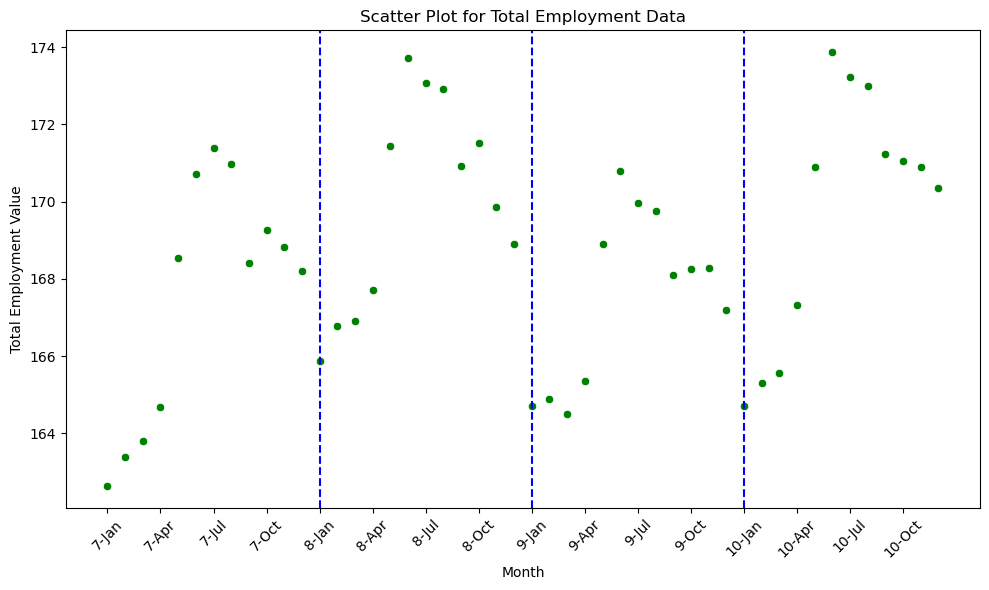

In [372]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Month', y='Value', data=melted_total_data, marker='o', color='green')

for i in range(12, len(melted_total_data['Month']), 12):
    plt.axvline(x=i, color='blue', linestyle='--', label=f'Vertical Line {i}')

plt.xlabel('Month')
plt.ylabel('Total Employment Value')
plt.title('Scatter Plot for Total Employment Data')

plt.xticks(range(0, len(melted_total_data['Month']), 3), melted_total_data['Month'][::3], rotation=45)

# Show the plot
plt.tight_layout()
plt.show()